# numpyを使って配列データを扱う

In [1]:
import numpy as np

「配列(array)」データを作ってみます。

In [2]:
v = np.array([1, 2, 3])

In [3]:
v

array([1, 2, 3])

これは足したりできます。(ベクトルってやつですね)

In [4]:
v + v

array([2, 4, 6])

In [5]:
3 * v

array([3, 6, 9])

In [6]:
v + 1

array([2, 3, 4])

shapeでサイズを見ることができます。ここでは1次元で要素3なので(3,)と出ます。

In [7]:
v.shape

(3,)

型を見てみます。numpyのn次元配列(ndarray)と出ます。

In [8]:
type(v)

numpy.ndarray

2次元の配列を作ってみます。やっぱり足したり引いたりできます。リスト自体にはそう言う機能はないので差に注目してください。

In [9]:
m = np.array([[1, 2, 3,], [4, 5, 6]])

In [10]:
m

array([[1, 2, 3],
       [4, 5, 6]])

In [11]:
m + m

array([[ 2,  4,  6],
       [ 8, 10, 12]])

In [12]:
3 * m

array([[ 3,  6,  9],
       [12, 15, 18]])

In [13]:
m + 1

array([[2, 3, 4],
       [5, 6, 7]])

サイズを見ます。サイズ2×3の配列になります。

In [14]:
m.shape

(2, 3)

In [15]:
print('行数は', m.shape[0])
print('列数は', m.shape[1])

行数は 2
列数は 3


In [16]:
type(m)

numpy.ndarray

スライスができます。

In [17]:
m[:2, :2]

array([[1, 2],
       [4, 5]])

In [18]:
m[0, :]

array([1, 2, 3])

In [19]:
m[:, -1]

array([3, 6])

In [20]:
m[:, 1:2]

array([[2],
       [5]])

多次元の配列に対して、reshape(-1)という特殊な命令をすると、1次元の配列に潰すことができます。

In [21]:
m

array([[1, 2, 3],
       [4, 5, 6]])

In [22]:
m.reshape(-1)

array([1, 2, 3, 4, 5, 6])

2次元配列を「行列」とみなして、行列とベクトルの掛け算をやってみます。

$$\begin{bmatrix}
1 & 2 & 3\\
4 & 5 & 6
\end{bmatrix}
\begin{bmatrix}
1\\
2\\
3
\end{bmatrix} = 
\begin{bmatrix}
1 + 4 + 9\\
4 + 10 + 18
\end{bmatrix}
=
\begin{bmatrix}
14\\
32
\end{bmatrix}$$

In [23]:
np.dot(m, v)

array([14, 32])

行列同士の掛け算をやってみます。

$$\begin{bmatrix}
1 & 2 & 3\\
4 & 5 & 6
\end{bmatrix}
\begin{bmatrix}
1 & 4\\
2 & 5\\
3 & 6
\end{bmatrix}
= 
\begin{bmatrix}
14 & 4 + 10 + 18\\
32 & 16 + 25 + 36
\end{bmatrix}
= 
\begin{bmatrix}
14 & 32
32 & 77
\end{bmatrix}
$$

In [24]:
np.dot(m, np.transpose(m))

array([[14, 32],
       [32, 77]])

# 数値の2次元配列を画像として扱う

matplotlibをimportします。画像を扱う機能がmatplotlib.imageのモジュールにあるので、とりあえずmpimgと短縮名をつけておきます。つけなくても構いません。

In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

素材で使う以下の画像 http://art.ist.hokudai.ac.jp/~takigawa/prog/test_gazou.jpg をダウンロードして、test_gazou.pngと言う名前で保存します。

<img src="http://art.ist.hokudai.ac.jp/~takigawa/prog/test_gazou.jpg ">

In [26]:
import urllib.request
url = 'http://art.ist.hokudai.ac.jp/~takigawa/prog/test_gazou.jpg'
urllib.request.urlretrieve(url, 'test_gazou.jpg')

('test_gazou.jpg', <http.client.HTTPMessage at 0x108ea5208>)

In [27]:
img = mpimg.imread('test_gazou.jpg')

In [28]:
type(img)

numpy.ndarray

このカラー画像は配列データです。サイズを見てみましょう。

In [29]:
img.shape

(270, 410, 3)

縦270ピクセル、横410ピクセル、3チャンネルの3次元配列データとわかります。最後の次元は色のチャンネルでRGB、1番目はR(赤)、2番目はG(緑)、3番目はB(青)を混ぜてそれぞれのピクセルのカラーがデータになっています。このRGB、赤（Red）緑（Green ）青（Blue）の3色を、目に見える光の中での、最も基本の色として「光の三原色」と呼びます。

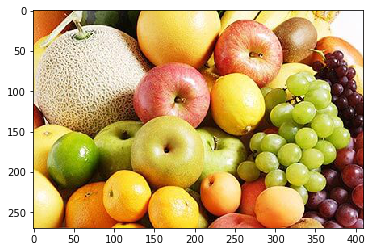

In [30]:
plt.imshow(img)

各々の画素の値の最大値と最小値を調べておきましょう。 

In [31]:
np.max(img), np.min(img)

(255, 0)

RGBのそれぞれのチャンネルの濃淡データを見てみることにしましょう。値が大きい方が普通明るいですが、matplotlibの色付けは標準では逆なので、最大値で割って1から減じることで0から1の値に直しておきます(正規化と言います)。

cmapはカラーマップで、名前がついたカラーマップが色々定義されています。

https://matplotlib.org/examples/color/colormaps_reference.html

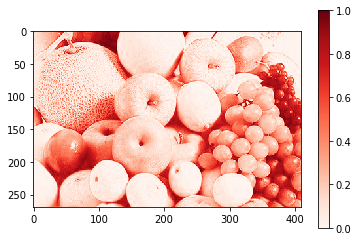

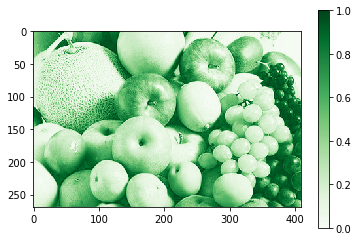

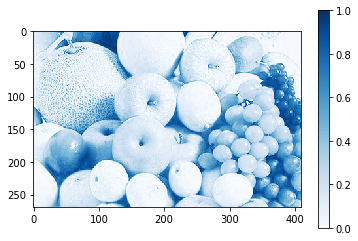

In [32]:
plt.imshow(1-img[:, :, 0]/255, cmap='Reds')
plt.colorbar()
plt.show()

plt.imshow(1-img[:, :, 1]/255, cmap='Greens')
plt.colorbar()
plt.show()

plt.imshow(1-img[:, :, 2]/255, cmap='Blues')
plt.colorbar()
plt.show()

３つのチャンネルの平均値の配列を作って、この濃淡の配列データをモノクロで表示してみましょう。

In [33]:
x = ((1-img[:, :, 0]/255) + (1-img[:, :, 1]/255) + (1-img[:, :, 2]/255))/3

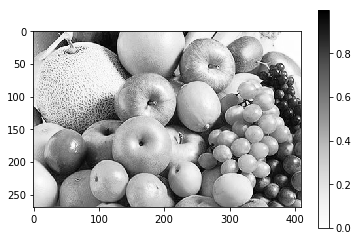

In [34]:
plt.imshow(x, cmap='Greys')
plt.colorbar()

https://matplotlib.org/examples/color/colormaps_reference.html を参考にカラーマップを適当に変えてみましょう。

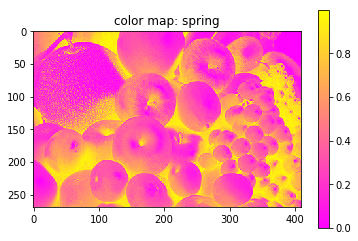

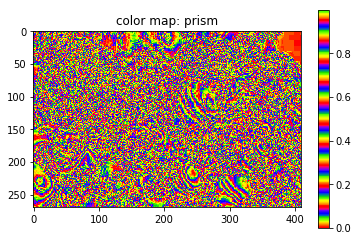

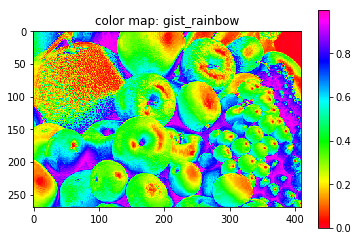

In [35]:
plt.imshow(x, cmap='spring')
plt.colorbar()
plt.title('color map: spring')
plt.show()

plt.imshow(x, cmap='prism')
plt.colorbar()
plt.title('color map: prism')
plt.show()

plt.imshow(x, cmap='gist_rainbow')
plt.colorbar()
plt.title('color map: gist_rainbow')
plt.show()

reshape(-1)とすると、配列を全部潰して1次元の配列にすることができます。

In [36]:
x.reshape(-1).shape

(110700,)

画素がどう言う値を取っているかのヒストグラムを見てみましょう。

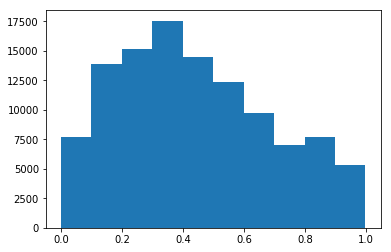

In [37]:
plt.hist(x.reshape(-1))
plt.show()

スライスで部分を切り取ってみましょう。

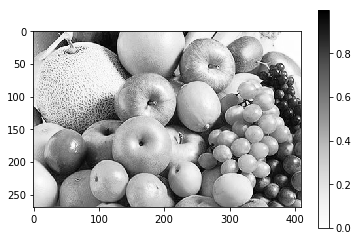

In [38]:
plt.imshow(x, cmap='Greys')
plt.colorbar()

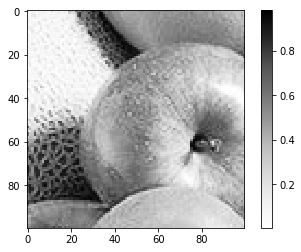

In [39]:
plt.imshow(x[50:150, 100:200], cmap='Greys')
plt.colorbar()

画素値を操作することで、画像をいじれます。例えば、0.5より小さい値は全部0(白)に塗ってみましょう。

In [40]:
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        if x[i, j] < 0.5:
            x[i, j] = 0.0

明るいところ(値が0.5より小さいところ)が完全に白になるので、飛んだ感じになります。

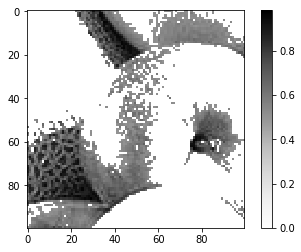

In [41]:
plt.imshow(x[50:150, 100:200], cmap='Greys')
plt.colorbar()

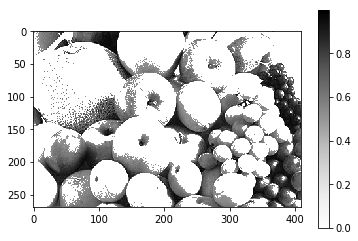

In [42]:
plt.imshow(x, cmap='Greys')
plt.colorbar()

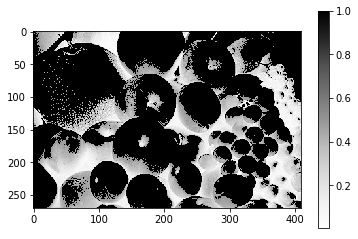

In [43]:
plt.imshow(1-x, cmap='Greys')
plt.colorbar()

1から引いて白黒反転して見ましょう。

# 機械学習に使う手書き数字データを見てみよう

機械学習のライブラリ scikit-learn をimportします。この中にいくつか例題データセットが入っています。

In [44]:
import sklearn.datasets

In [45]:
data = sklearn.datasets.load_digits()

In [46]:
type(data)

sklearn.utils.Bunch

見たことない型の場合、dirというコマンドで何が入っているか情報が得られます。

In [47]:
dir(data)

['DESCR', 'data', 'images', 'target', 'target_names']

imagesという部分に画像データが入っています。

In [48]:
type(data['images'])

numpy.ndarray

yとしてこの画像がどの数字の画像かのデータも読み込んでおきます。

In [49]:
z = data['images']
y = data['target']

In [50]:
z.shape

(1797, 8, 8)

8 x 8の画像が1797枚あるようです。

In [51]:
type(y)

numpy.ndarray

In [52]:
y.shape

(1797,)

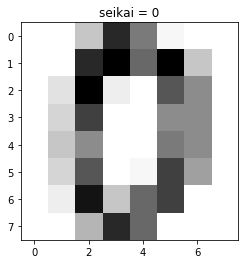

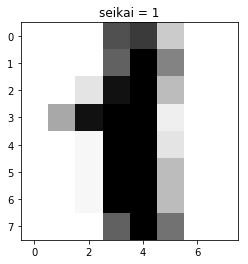

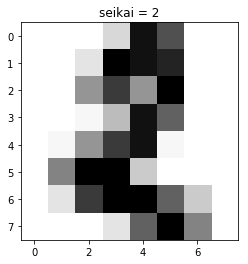

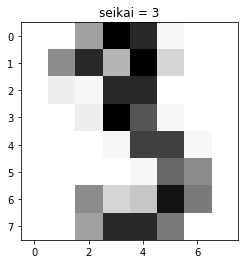

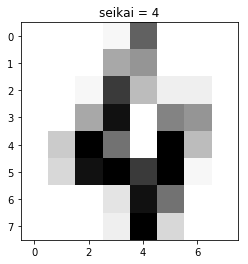

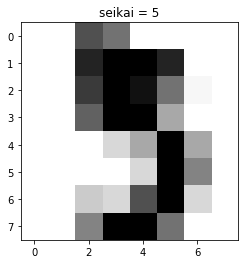

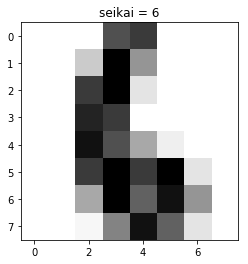

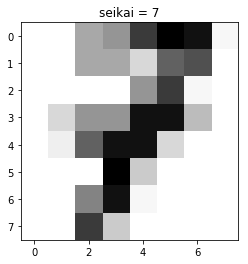

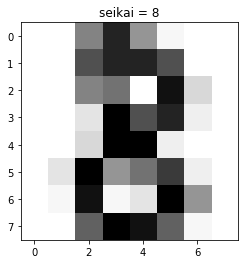

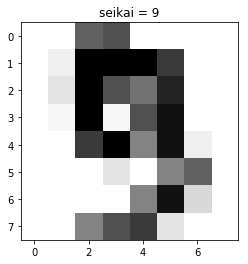

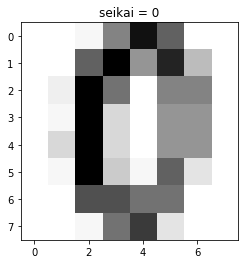

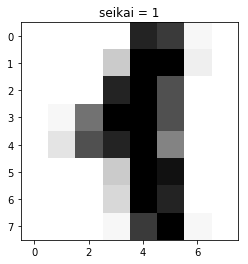

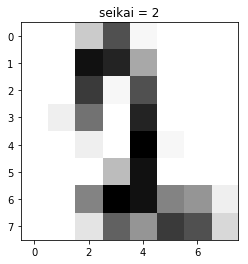

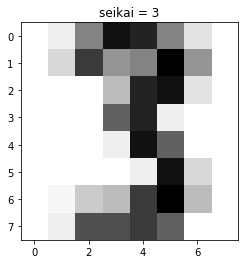

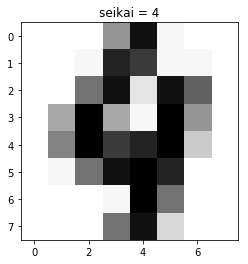

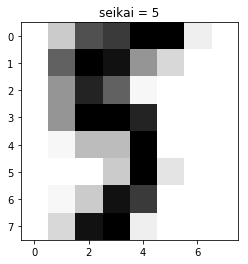

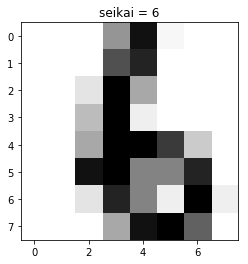

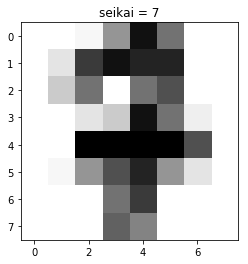

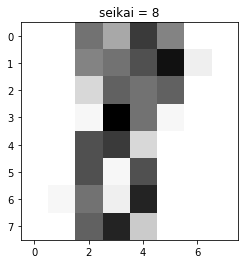

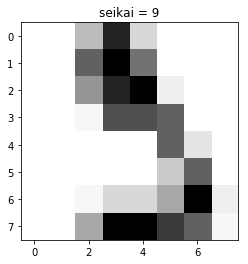

In [53]:
for i in range(20):
    plt.imshow(z[i], cmap='Greys')
    plt.title('seikai = {}'.format(y[i]))
    plt.show()

ということは機械学習では

In [54]:
z[1].reshape(-1)

array([  0.,   0.,   0.,  12.,  13.,   5.,   0.,   0.,   0.,   0.,   0.,
        11.,  16.,   9.,   0.,   0.,   0.,   0.,   3.,  15.,  16.,   6.,
         0.,   0.,   0.,   7.,  15.,  16.,  16.,   2.,   0.,   0.,   0.,
         0.,   1.,  16.,  16.,   3.,   0.,   0.,   0.,   0.,   1.,  16.,
        16.,   6.,   0.,   0.,   0.,   0.,   1.,  16.,  16.,   6.,   0.,
         0.,   0.,   0.,   0.,  11.,  16.,  10.,   0.,   0.])

という入力から、これが数字としては 

In [55]:
y[1]

1

を表すということを判定する問題になります。

In [56]:
z.shape

(1797, 8, 8)

それぞれの画像は1次元につぶして、配列として扱うことにするので、8 x 8 画像部分を長さ64の1次元配列に直します。全体を一気に直すには、下記のようにサイズを指定して、reshapeします。

In [57]:
x = z.reshape((1797, 64))

一応、0番目のデータが同じかどうかを確認しておきましょう。

In [58]:
x[0]

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

In [59]:
z[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

In [60]:
z[0].reshape(-1)

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

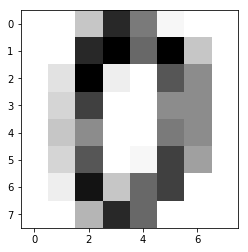

In [61]:
plt.imshow(z[0], cmap='Greys')

さて、これを機械学習するための準備が整いました！！

In [62]:
from sklearn.ensemble import ExtraTreesClassifier

In [63]:
model = ExtraTreesClassifier()

10番目から500番目をモデルの「訓練」に使って予測器を作ってみます。

In [64]:
model.fit(x[10:500, :], y[10:500])

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

訓練に使っていない0番目から10番目を予測して見ましょう。

In [65]:
y_pred = model.predict(x[0:10, :])
for i in range(10):    
    print('i', i, 'yosoku', y_pred[i], 'seikai', y[i], end=' --> ')
    if y_pred[i] == y[i]:
        print('correct!')
    else:
        print('wrong!')

i 0 yosoku 0 seikai 0 --> correct!
i 1 yosoku 1 seikai 1 --> correct!
i 2 yosoku 2 seikai 2 --> correct!
i 3 yosoku 3 seikai 3 --> correct!
i 4 yosoku 4 seikai 4 --> correct!
i 5 yosoku 9 seikai 5 --> wrong!
i 6 yosoku 6 seikai 6 --> correct!
i 7 yosoku 7 seikai 7 --> correct!
i 8 yosoku 8 seikai 8 --> correct!
i 9 yosoku 9 seikai 9 --> correct!


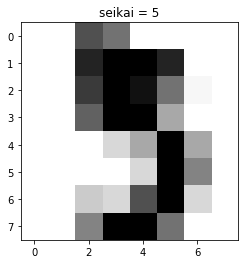

In [66]:
plt.imshow(z[5], cmap='Greys')
plt.title('seikai = {}'.format(y[5]))
plt.show()